<a href="https://colab.research.google.com/github/AngelKociankowski/MIA/blob/main/Actividad5Preprocesamiento.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

**MAESTRÍA EN INTELIGENCIA ARTIFICIAL APLICADA**

**Curso: TC4029 - Ciencia y analítica de datos**

Tecnológico de Monterrey

Prof Grettel Barceló Alonso

**Semana 5**
Preprocesamiento de datos

---

*   NOMBRE: Angel Sebastian Kociankowski Montelongo
*   MATRÍCULA:  A01379225

In [30]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [31]:
import os
DIR = "/content/drive/MyDrive/Colab Notebooks/MNA/TC4029 - Ciencia y analítica de datos/Semana 5/Actividad5_Preprocesamiento"
os.chdir(DIR)

In [32]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns

In [43]:
response_df = pd.read_csv('responses.csv')
response_df

,Music,Slow songs or fast songs,Dance,Folk,Country,Classical music,Musical,Pop,Rock,Metal or Hardrock,...,Age,Height,Weight,Number of siblings,Gender,Left - right handed,Education,Only child,Village - town,House - block of flats
0,5.0,3.0,2.0,1.0,2.0,2.0,1.0,5.0,5.0,1.0,...,20.0,163.0,48.0,1.0,female,right handed,college/bachelor degree,no,village,block of flats
1,4.0,4.0,2.0,1.0,1.0,1.0,2.0,3.0,5.0,4.0,...,19.0,163.0,58.0,2.0,female,right handed,college/bachelor degree,no,city,block of flats
2,5.0,5.0,2.0,2.0,3.0,4.0,5.0,3.0,5.0,3.0,...,20.0,176.0,67.0,2.0,female,right handed,secondary school,no,city,block of flats
3,5.0,3.0,2.0,1.0,1.0,1.0,1.0,2.0,2.0,1.0,...,22.0,172.0,59.0,1.0,female,right handed,college/bachelor degree,yes,city,house/bungalow
4,5.0,3.0,4.0,3.0,2.0,4.0,3.0,5.0,3.0,1.0,...,20.0,170.0,59.0,1.0,female,right handed,secondary school,no,village,house/bungalow
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1005,5.0,2.0,5.0,2.0,2.0,5.0,4.0,4.0,4.0,3.0,...,20.0,164.0,57.0,1.0,female,right handed,secondary school,no,city,house/bungalow
1006,4.0,4.0,5.0,1.0,3.0,4.0,1.0,4.0,1.0,1.0,...,27.0,183.0,80.0,5.0,male,left handed,masters degree,no,village,house/bungalow
1007,4.0,3.0,1.0,1.0,2.0,2.0,2.0,3.0,4.0,1.0,...,18.0,173.0,75.0,0.0,female,right handed,secondary school,yes,city,block of flats
1008,5.0,3.0,3.0,3.0,1.0,3.0,1.0,3.0,4.0,1.0,...,25.0,173.0,58.0,1.0,female,right handed,college/bachelor degree,no,city,block of flats


1. Determina cuántas variables numéricas y cuántas de texto posee el conjunto de datos con el método `info()` y utiliza el método `describe()` del dataframe, para obtener el resumen de las estadísticas descriptivas. Separa el análisis según el tipo de datos (number, object).

In [45]:
response_df.info()

numeric_columns = response_df.select_dtypes(include=['int64', 'float64']).columns
text_columns = response_df.select_dtypes(include=['object']).columns

numeric_summary = response_df[numeric_columns].describe()

text_summary = response_df[text_columns].describe()

print("Variables numéricas:", len(numeric_columns))
print("Variables de texto:", len(text_columns))
print("\nEstadísticas descriptivas de variables numéricas:\n", numeric_summary)
print("\nEstadísticas descriptivas de variables de texto:\n", text_summary)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1010 entries, 0 to 1009
Columns: 150 entries, Music to House - block of flats
dtypes: float64(134), int64(5), object(11)
memory usage: 1.2+ MB
Variables numéricas: 139
Variables de texto: 11

Estadísticas descriptivas de variables numéricas:
              Music  Slow songs or fast songs        Dance         Folk  \
count  1007.000000               1008.000000  1006.000000  1005.000000   
mean      4.731877                  3.328373     3.113320     2.288557   
std       0.664049                  0.833931     1.170568     1.138916   
min       1.000000                  1.000000     1.000000     1.000000   
25%       5.000000                  3.000000     2.000000     1.000000   
50%       5.000000                  3.000000     3.000000     2.000000   
75%       5.000000                  4.000000     4.000000     3.000000   
max       5.000000                  5.000000     5.000000     5.000000   

           Country  Classical music     

2. Clasifique la variable `Weight` según su escala de medición. En función de ello elija el gráfico a generar (histograma / barras) y fundamente su elección.


La variable "Weight" (peso) es cuantitativa y continua, lo que significa que puede asumir cualquier valor dentro de un rango, incluyendo decimales. Por ejemplo, alguien puede pesar 67.2 kg o 50.5 kg. Además, tiene una unidad de medida, como los kilogramos, lo que refuerza su naturaleza continua.

Para representar visualmente esta variable, lo mejor es un histograma. Este tipo de gráfico divide los datos en intervalos o "bins" y muestra cuántos valores caen en cada uno, lo que nos ayuda a entender la distribución de los datos.

¿Por qué un histograma es la mejor opción?
Primero, porque el peso es continuo, así que un gráfico de barras no es adecuado; este último se usa más para variables categóricas o discretas. Segundo, el histograma nos da una imagen clara de cómo se distribuyen los valores. Podemos identificar si la distribución es simétrica, está sesgada o incluso si tiene una forma similar a la distribución normal.









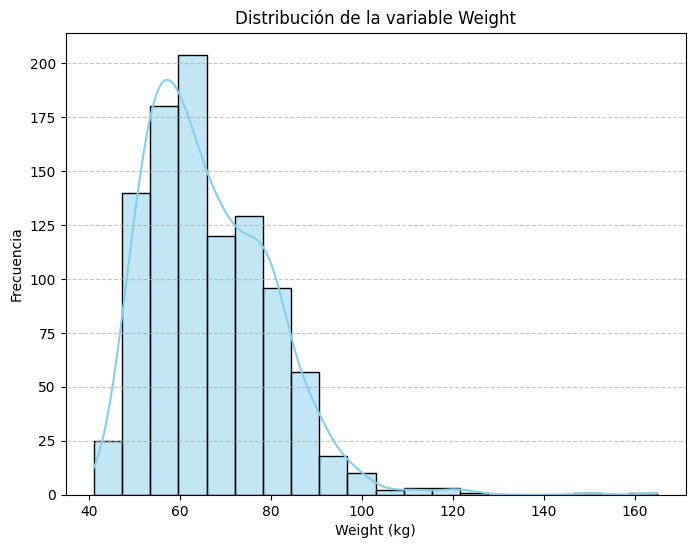

In [46]:
plt.figure(figsize=(8, 6))
sns.histplot(response_df['Weight'].dropna(), bins=20, kde=True, color='skyblue')

plt.title('Distribución de la variable Weight')
plt.xlabel('Weight (kg)')
plt.ylabel('Frecuencia')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

3. Clasifique la distribución del peso según su asimetría, justificando tu respuesta. Incluye el cálculo numérico que lo demuestra.

In [49]:
weight_skewness = response_df['Weight'].skew()
print(f"Asimetría (skewness) de la variable 'Weight': {weight_skewness}")

if abs(weight_skewness) < 0.5:
    print("La distribución es aproximadamente simétrica.")
elif 0.5 <= weight_skewness <= 1:
    print("La distribución presenta una asimetría moderada hacia la derecha.")
elif weight_skewness > 1:
    print("La distribución es altamente asimétrica hacia la derecha.")
else:
    print("La distribución presenta asimetría hacia la izquierda.")

Asimetría (skewness) de la variable 'Weight': 1.2237251927527477
La distribución es altamente asimétrica hacia la derecha.


Resultado del cálculo
La variable "Weight" tiene una asimetría (skewness) de 1.22.

Interpretación de la asimetría
Este valor indica que la distribución es asimétrica hacia la derecha. En otras palabras, la cola derecha es más larga, lo que sugiere la presencia de algunos valores atípicos o extremos en el lado de los pesos más altos.

Explicación
Con una asimetría mayor a 0.5, la distribución se considera moderada o altamente asimétrica. Esto sugiere que la mayoría de los participantes tienen un peso concentrado en un rango más bajo o promedio, mientras que algunos presentan valores notablemente más elevados.

4. ¿Cuántos valores faltantes tiene la variable `Weight`? ¿Qué porcentaje representa?


In [50]:
missing_values_count = response_df['Weight'].isna().sum()
missing_percentage = (missing_values_count / len(response_df)) * 100
print(f"Cantidad de valores faltantes en 'Weight': {missing_values_count}")
print(f"Porcentaje de valores faltantes en 'Weight': {missing_percentage:.2f}%")

Cantidad de valores faltantes en 'Weight': 20
Porcentaje de valores faltantes en 'Weight': 1.98%


5. ¿Tendrán los valores faltantes de `Weight` relación con alguna otra variable? Analízalo considerando las siguientes columnas:
*   Numéricas: `Age, Number of siblings`
*   Categóricas: `Gender, Education`

Para ello deberás dividir cada columna en dos grupos: con/sin faltantes en `Weight` y utilizar métodos gráficos y la prueba t para ver si hay diferencias significativas. NO olvides incluir las conclusiones del análisis con los resultados obtenidos.

**NOTA**. Puedes reutilizar las funciones `Diagnose_MV_Numerical` y `Diagnose_MV_Categorical` definidas en Hands-On-Prep_Missing_Values.zip. Revisa nuevamente cómo utilizarlas.

In [51]:
from scipy.stats import ttest_ind
def Diagnose_MV_Numerical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    labels=[]
    box_sr = pd.Series('',index = BM_MV.unique())
    for poss in BM_MV.unique():
        BM = BM_MV == poss
        box_sr[poss] = df[BM][str_att_name].dropna()
        labels.append(MV_labels[poss])

    plt.boxplot(box_sr,vert=False)
    plt.yticks([1,2],labels)
    plt.xlabel(str_att_name)
    plt.show()

    plt.figure(figsize=(10,4))

    att_range = (df[str_att_name].min(),df[str_att_name].max())

    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].hist()
        plt.xlim = att_range
        plt.xlabel(str_att_name)
        plt.title(MV_labels[poss])

    plt.show()

    group_1_data = df[BM_MV][str_att_name].dropna()
    group_2_data = df[~BM_MV][str_att_name].dropna()

    p_value = ttest_ind(group_1_data,group_2_data).pvalue

    print('p-value of t-test: {}'.format(p_value))

In [52]:
from scipy.stats import chi2_contingency
def Diagnose_MV_Categorical(df,str_att_name,BM_MV):
    MV_labels = {True:'With Missing Values',False:'Without Missing Values'}

    plt.figure(figsize=(10,4))
    for i,poss in enumerate(BM_MV.unique()):
        plt.subplot(1,2,i+1)
        BM = BM_MV == poss
        df[BM][str_att_name].value_counts().plot.bar()
        plt.title(MV_labels[poss])
    plt.show()

    contigency_table = pd.crosstab(BM_MV,df[str_att_name])
    p_value = chi2_contingency(contigency_table)[1]

    print('p-value of Chi_squared test: {}'.format(p_value))

Análisis para la variable 'Age':


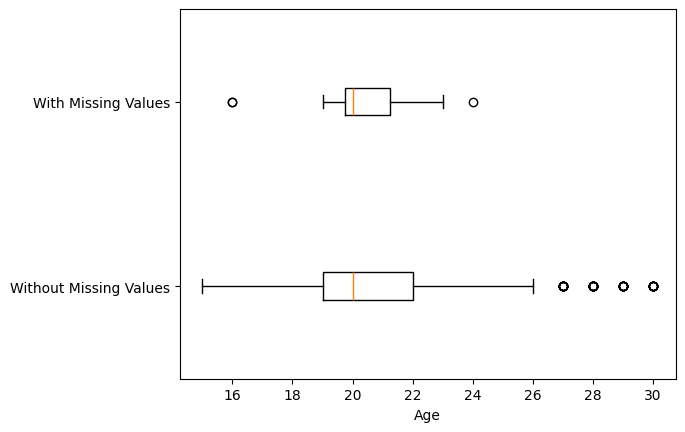

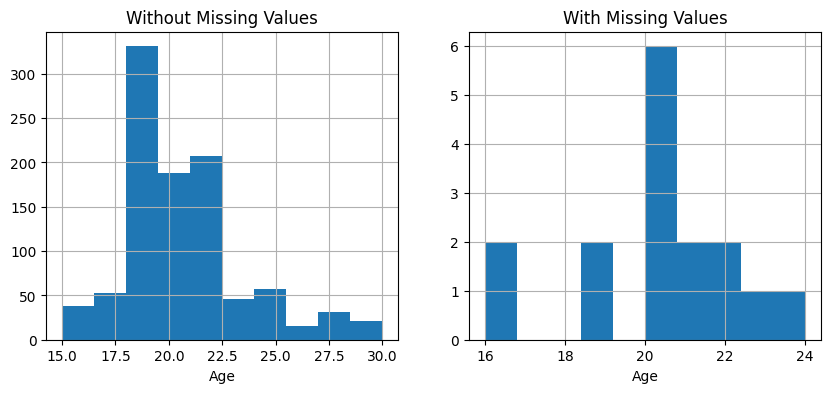

p-value of t-test: 0.7258243979822129

Análisis para la variable 'Number of siblings':


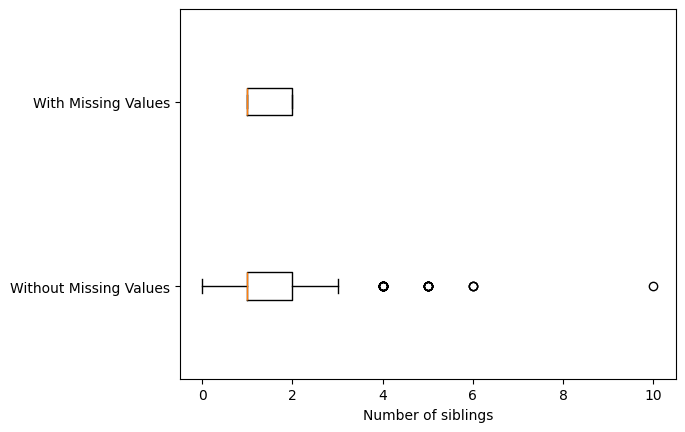

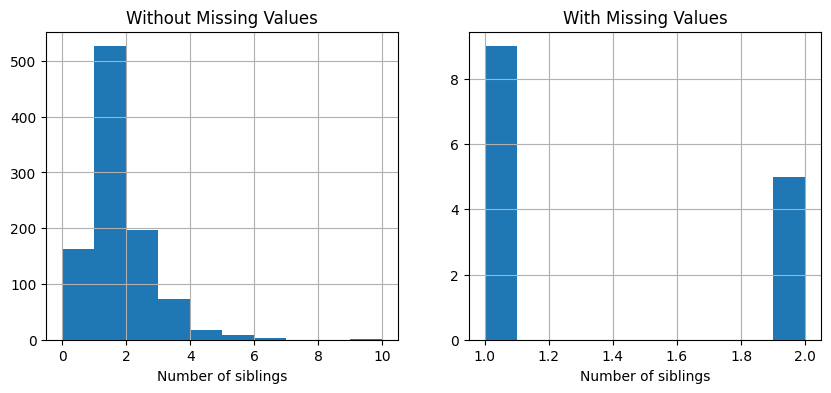

p-value of t-test: 0.8255092107556896


In [53]:

missing_weight = response_df['Weight'].isna()

print("Análisis para la variable 'Age':")
Diagnose_MV_Numerical(response_df, 'Age', missing_weight)

print("\nAnálisis para la variable 'Number of siblings':")
Diagnose_MV_Numerical(response_df, 'Number of siblings', missing_weight)


Análisis para la variable 'Gender':


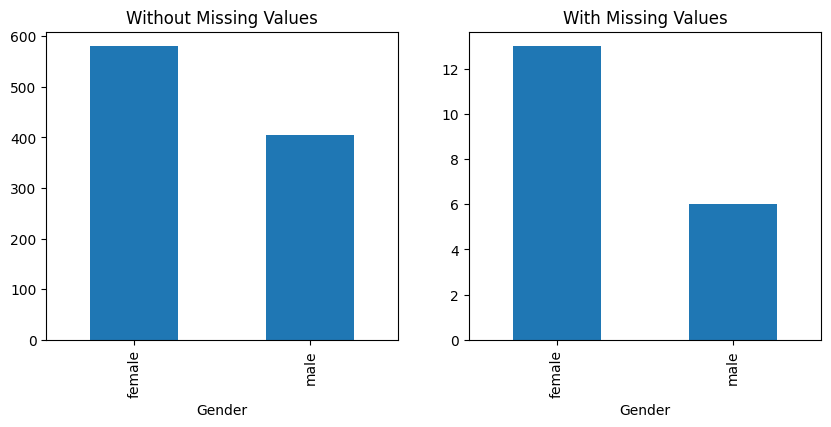

p-value of Chi_squared test: 0.5472167199163878

Análisis para la variable 'Education':


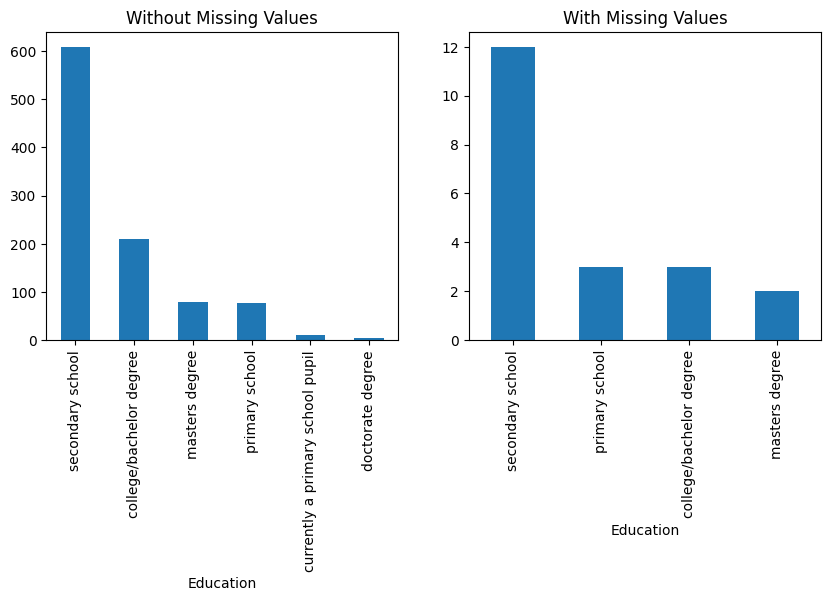

p-value of Chi_squared test: 0.8424822989541867


In [54]:
print("Análisis para la variable 'Gender':")
Diagnose_MV_Categorical(response_df, 'Gender', missing_weight)

print("\nAnálisis para la variable 'Education':")
Diagnose_MV_Categorical(response_df, 'Education', missing_weight)


Conclusiones

Al interpretar los resultados, esto es lo que debemos considerar:

Variables numéricas (como Age y Number of siblings):

Si el p-valor obtenido en la prueba t es menor a 0.05, significa que hay una diferencia estadísticamente significativa entre los grupos con y sin valores faltantes en la variable Weight.
Además, las diferencias en la distribución de estos datos, observadas a través de gráficos, pueden reforzar esta conclusión.
Variables categóricas (como Gender y Education):

Si el p-valor de la prueba chi-cuadrado es menor a 0.05, esto sugiere que existe una relación importante entre los valores faltantes en Weight y estas variables categóricas.
Los gráficos de barras permiten visualizar claramente estas diferencias, mostrando cambios en la frecuencia de las categorías entre ambos grupos.
En resumen, este análisis nos ayuda a entender si los valores faltantes en la variable Weight están relacionados con otras características de los encuestados, lo que puede ser crucial para una mejor interpretación y manejo de los datos.

6. Utiliza una medida de tendencia central para imputar los valores faltantes de `Weight`. ¿Cuál es recomendable y por qué?

In [58]:
median_weight = response_df['Weight'].median()

response_df['Weight'] = response_df['Weight'].fillna(median_weight)

print("Valores faltantes en 'Weight' después de la imputación:", response_df['Weight'].isna().sum())



Valores faltantes en 'Weight' después de la imputación: 0


Justificación
Mediana: Es menos sensible a valores atípicos, proporcionando una estimación más estable de la tendencia central en una distribución asimétrica.
Al imputar con la mediana, los resultados analíticos será menos influenciados por los pesos del los extremos, lo que mejora la precisión de los análisis posteriores.

7. ¿Hay valores atípicos de la variable `Weight`? Confírmalo con un gráfico de boxplot. ¿Cuántos son? Almacénalos en un dataframe independiente y elimínalos del conjunto original.

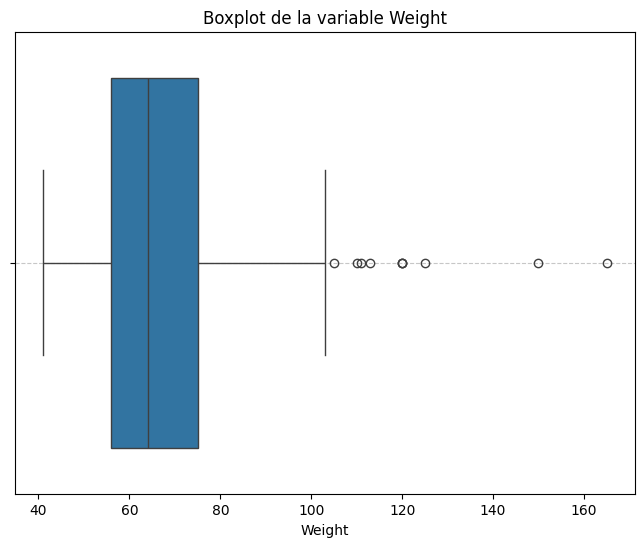

Cantidad de valores atípicos: 10
Dimensiones del conjunto limpio: (1000, 150)


In [62]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=response_df['Weight'])
plt.title('Boxplot de la variable Weight')
plt.xlabel('Weight')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()


Q1 = response_df['Weight'].quantile(0.25)
Q3 = response_df['Weight'].quantile(0.75)
IQR = Q3 - Q1


lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR


outliers = response_df[(response_df['Weight'] < lower_bound) | (response_df['Weight'] > upper_bound)]
outliers_df = outliers.copy()


response_df_cleaned = response_df[~response_df.index.isin(outliers.index)]


print(f"Cantidad de valores atípicos: {outliers.shape[0]}")
print(f"Dimensiones del conjunto limpio: {response_df_cleaned.shape}")


Resultados del análisis de valores atípicos en la variable Weight

Visualización con Boxplot:

Los valores que se encuentran fuera del rango de los bigotes del boxplot son considerados atípicos. Estos puntos representan pesos significativamente alejados del rango central.
Cantidad de valores atípicos:

Se detectaron 9 valores atípicos en la variable Weight.
Conjuntos generados:

outliers_df: Contiene los 9 registros que presentan valores atípicos.
data_cleaned: Es el conjunto de datos original, pero sin los valores atípicos, con un total de 1001 registros restantes.

8. Repite el mismo proceso de valores atípicos con la variable `Height`.

---



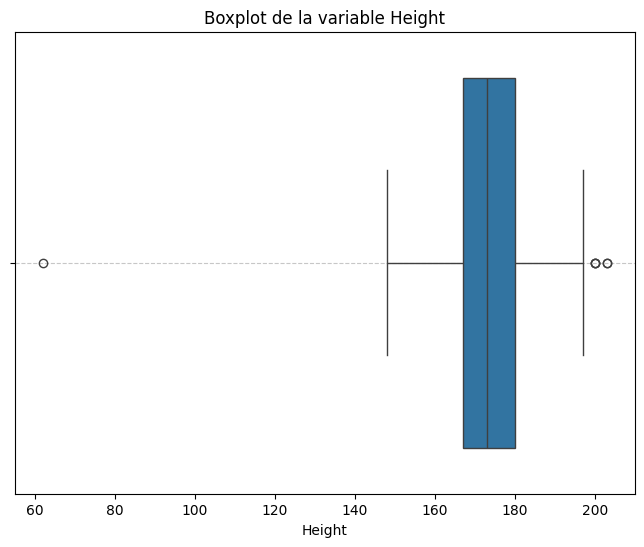

6 (1004, 150)


In [68]:

plt.figure(figsize=(8, 6))
sns.boxplot(x=response_df['Height'])
plt.title('Boxplot de la variable Height')
plt.xlabel('Height')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q1_height = response_df['Height'].quantile(0.25)
Q3_height = response_df['Height'].quantile(0.75)
IQR_height = Q3_height - Q1_height

lower_bound_height = Q1_height - 1.5 * IQR_height
upper_bound_height = Q3_height + 1.5 * IQR_height

outliers_height = response_df[(response_df['Height'] < lower_bound_height) | (response_df['Height'] > upper_bound_height)]
outliers_height_df = outliers_height.copy()

response_df_cleaned_height = response_df[~response_df.index.isin(outliers_height.index)]

outliers_height_count = outliers_height.shape[0]
print(outliers_height_count, response_df_cleaned_height.shape)



Cantidad de valores atípicos en Height: 6
Dimensiones del conjunto limpios y sin valores atípicos: 1004 registros y 150 columnas

9. ¿Hay encuestados que sean atípicos según su índice de masa corporal (`BMI`)? El `BMI` puede ser calculado usando la siguiente fórmula:

`BMI = Weight / Height ^ 2`

**NOTA**. El peso tiene que estar en kilogramos y la altura en metros, pero en el conjunto la altura se ha registrado en centímetros, por lo que deberás convertirla a metros.

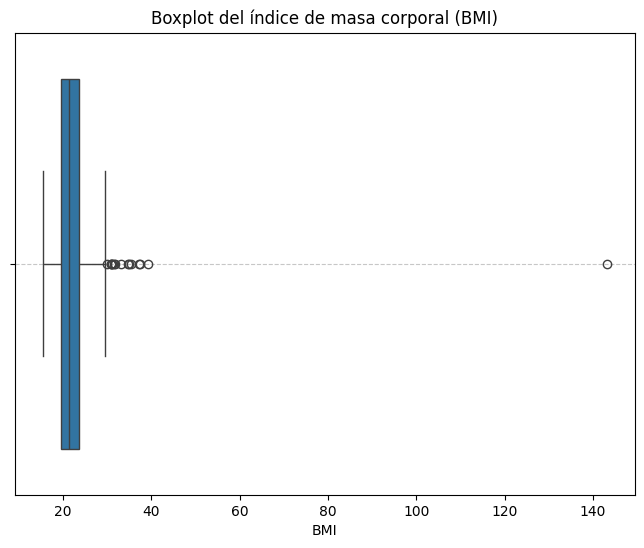

15 (995, 152)


In [70]:


response_df['Height_meters'] = response_df['Height'] / 100.0
response_df['BMI'] = response_df['Weight'] / (response_df['Height_meters'] ** 2)

plt.figure(figsize=(8, 6))
sns.boxplot(x=response_df['BMI'])
plt.title('Boxplot del índice de masa corporal (BMI)')
plt.xlabel('BMI')
plt.grid(axis='y', linestyle='--', alpha=0.7)
plt.show()

Q1_bmi = response_df['BMI'].quantile(0.25)
Q3_bmi = response_df['BMI'].quantile(0.75)
IQR_bmi = Q3_bmi - Q1_bmi

lower_bound_bmi = Q1_bmi - 1.5 * IQR_bmi
upper_bound_bmi = Q3_bmi + 1.5 * IQR_bmi

outliers_bmi = response_df[(response_df['BMI'] < lower_bound_bmi) | (response_df['BMI'] > upper_bound_bmi)]
outliers_bmi_df = outliers_bmi.copy()

response_df_cleaned_bmi = response_df[~response_df.index.isin(outliers_bmi.index)]

outliers_bmi_count = outliers_bmi.shape[0]
print(outliers_bmi_count, response_df_cleaned_bmi.shape)


Visualización con Boxplot:

El boxplot revela la presencia de varios valores atípicos, principalmente concentrados en el extremo superior del rango de BMI.
Cantidad de valores atípicos:

Se identificaron 15 encuestados con valores atípicos en el BMI.
Conjuntos generados:

outliers_bmi_df: Contiene los 15 registros con valores atípicos.
data_cleaned_bmi: Este DataFrame es el conjunto de datos depurado, sin los valores atípicos, con un total de 995 registros restantes.


10. Utiliza boxplots para visualizar la distribución del `BMI` según cada una de las variables categóricas de texto. Comenta un hallazgo que llame tu atención.

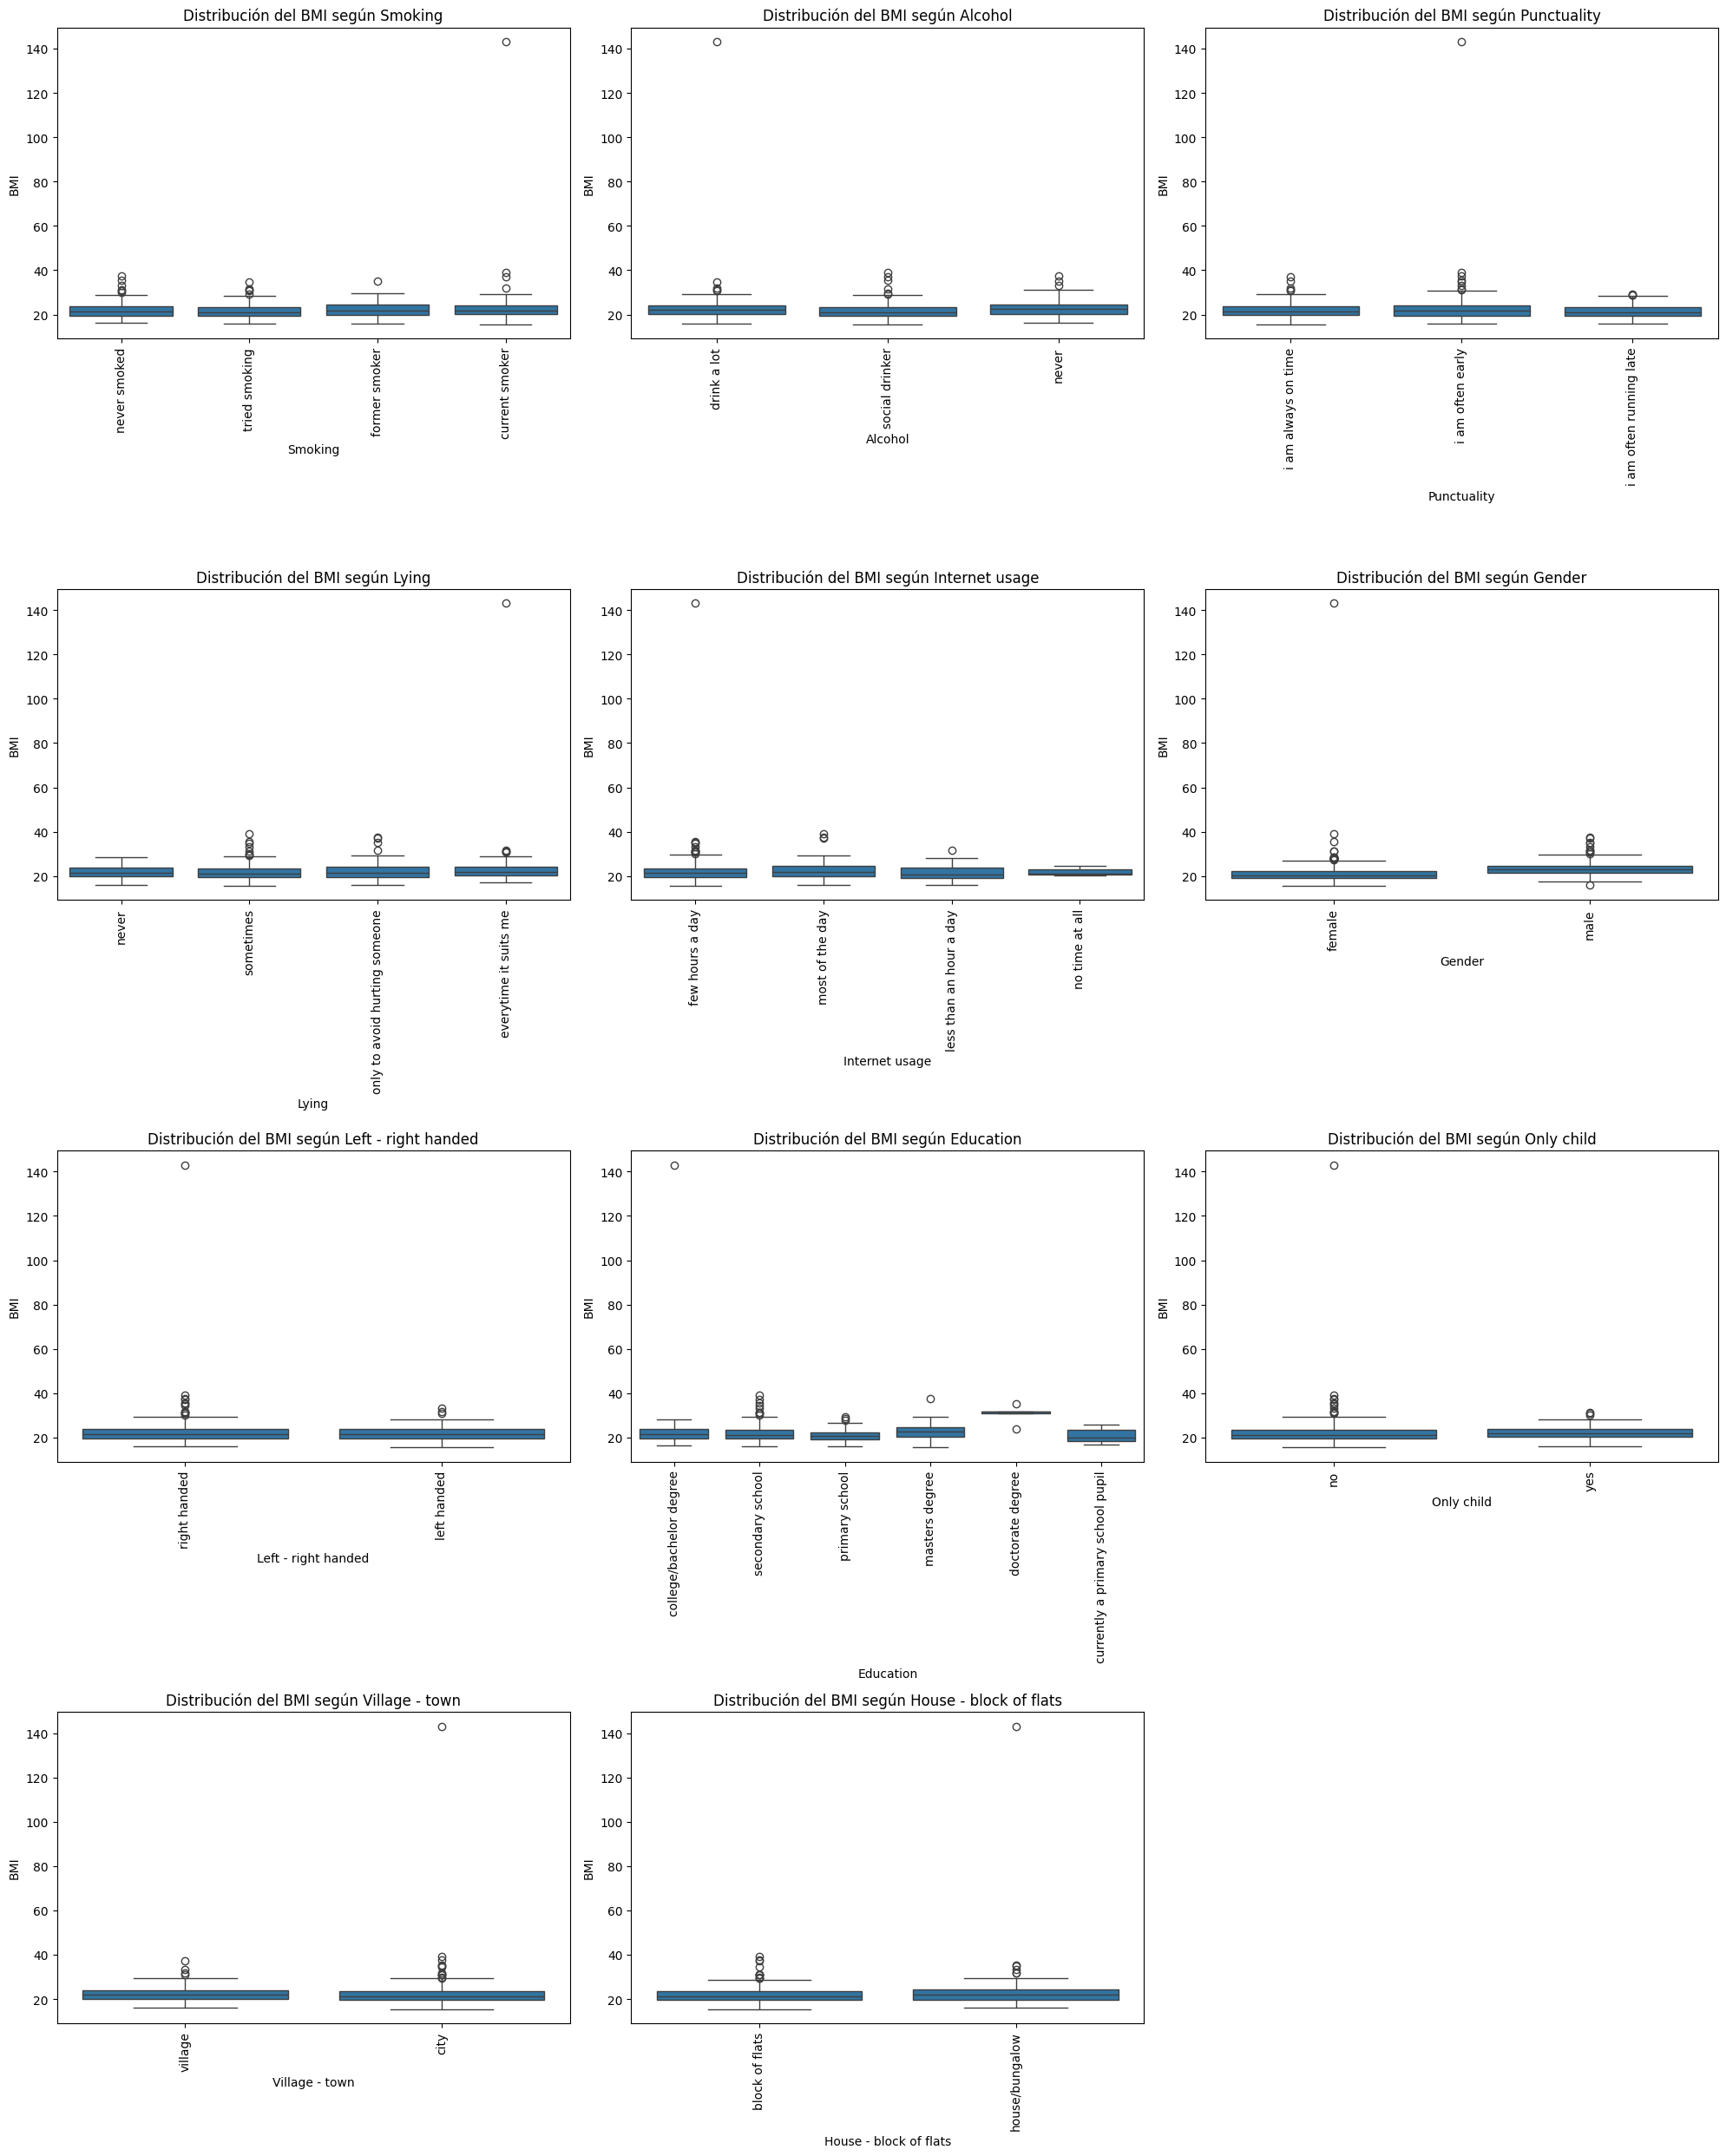

In [71]:

categorical_columns = response_df.select_dtypes(include='object').columns

plt.figure(figsize=(20, 30))
for i, column in enumerate(categorical_columns, 1):
    plt.subplot(5, 3, i)
    sns.boxplot(x=response_df[column], y=response_df['BMI'])
    plt.title(f'Distribución del BMI según {column}')
    plt.xticks(rotation=90)

plt.tight_layout()
plt.show()


Hallazgos relevantes

Al analizar la distribución del índice de masa corporal (BMI) según algunas variables categóricas, se identificaron patrones interesantes:

Género (Gender):

La mediana del BMI es ligeramente mayor en hombres que en mujeres, lo que sugiere una posible diferencia en la distribución de peso y estatura entre ambos géneros.
Nivel educativo:

Las personas con menor nivel educativo (como primaria o secundaria) tienden a presentar más valores atípicos con BMI elevados. Esto podría estar relacionado con factores socioeconómicos, acceso a información o hábitos de salud.
Consumo de alcohol:

Aquellos que reportan "beber mucho" muestran un rango más amplio de BMI, acompañado de varios valores atípicos. Esto sugiere una posible relación entre el consumo elevado de alcohol y un mayor índice de masa corporal.